In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely import wkt
import geopandas as gpd
from sodapy import Socrata

## Carga de Datos

In [ ]:
# Se cargan los datos de las variables del clima

data_humedad = pd.read_csv('datos_proyecto_humedad.csv')
data_precipitaciones = pd.read_csv('precipitaciones.csv')
data_temperatura = pd.read_csv('temperatura_mensual.csv')

In [7]:
print(f'humedad: {data_humedad.shape}')
print(f'precipitaciones: {data_precipitaciones.shape}')
print(f'temperatura: {data_temperatura.shape}')

humedad: (3997, 5)
precipitaciones: (4442, 4)
temperatura: (3973, 7)


In [ ]:
# Se ajusta el nombre de la variable que mide la humedad 

data_humedad = data_humedad.rename(columns={'valorobservado':'humedad'})

In [ ]:
# Se hace la unión de bases de forma 'inner' para eliminar posibles vacíos

columnas = ['mes','departamento','municipio']
data = pd.merge(data_precipitaciones,data_humedad, on=columnas, how='inner')
data = pd.merge(data, data_temperatura, on=columnas, how='inner')
data = data.drop('Unnamed: 0', axis = 1)

## Análisis de correlación

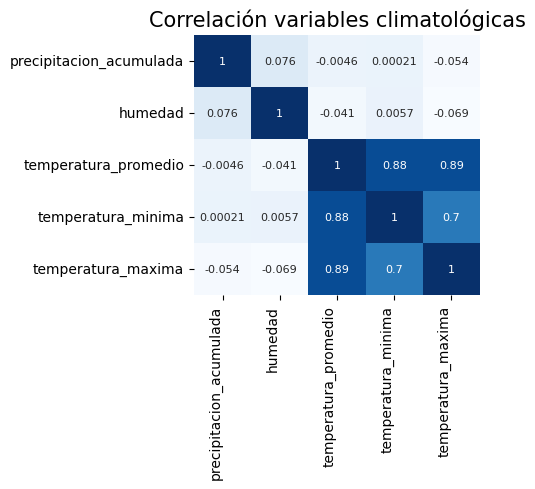

In [43]:
num_var = ['precipitacion_acumulada','humedad', 'temperatura_promedio','temperatura_minima', 'temperatura_maxima']
corr = data[num_var].corr()

plt.figure(figsize=(5,5))
sns.heatmap(
    corr, 
    cbar=False, 
    annot=True, 
    cmap='Blues',
    annot_kws={"size": 8}
)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.title('Correlación variables climatológicas', fontsize = 15)
plt.tight_layout()
plt.show()

## Análisis de Colinealidad

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[num_var]

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                  Variable         VIF
0  precipitacion_acumulada    1.272446
1                  humedad    8.635109
2     temperatura_promedio  114.582409
3       temperatura_minima   15.443818
4       temperatura_maxima   72.447475
